# Scraping
## Setup

The goal is to scrape the website and then use pandas to visualize the extracted information. For this exercise, it still makes sense to work in a Notebook.

jupyter notebook

Go ahead and open the new Python Notebook in the ~/code/tothbenceantal/data-book_scraping folder.

Start your notebook with the following imports in the first code cell:

import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib


In [2]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib


## First request

Insert a new cell and work on the TODOs (the starter code is the same as the one in the lecture’s slides!)

In [3]:
url = "http://books.toscrape.com/"

In [4]:
# TODO: Use `requests` to do an HTTP request to fetch data located at that URL
# TODO: Create a `BeautifulSoup` instance with that data

In [5]:
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

soup is now a variable containing the parser on which we can run our queries. For that, you need to analyze the “Books to Scrape”’s website HTML with the browser inspector.



Can you spot which HTML contains one book? Is it identical for each book?



In [6]:
books_html = soup.find_all("article", class_="product_pod")

## Parsing _one_ book

Let’s have a look at the HTML fragment of the first book. Insert a code cell and type in:

In [7]:
books_html[0].find("h3").find("a").string

'A Light in the ...'

In [8]:
book_title = books_html[0].find("h3").find("a").string
book_title

'A Light in the ...'

In [9]:
#book_price = 
price_html = books_html[0].find_all("p", class_="price_color") #books_html[0].find("h3").find("a").string #float()
book_price = float(price_html[0].string[1:])
book_price

51.77

In [10]:
book_stars_html = books_html[0].find("p", class_="star-rating")
book_stars_html


<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

In [11]:
book_stars_html.attrs['class']


['star-rating', 'Three']

❓ Define a method parse_rating which takes a list of classes (from the <p />) and returns the rating from 1 to 5:


In [12]:
def parse_rating(rating_classes):
    # TODO: Look at `rating_classes` and return the correct rating
    # e.g. of an argument for `rating_classes`: [ 'star-rating', 'Three' ]
    # "One" => 1
    # "Two" => 2
    # "Three" => 3
    # "Four" => 4
    # "Five" => 5
    if rating_classes[1] == "Five":
        return 5
    if rating_classes[1] == "Four":
        return 4
    if rating_classes[1] == "Three":
        return 3
    if rating_classes[1] == "Two":
        return 2
    if rating_classes[1] == "One":
        return 1
    return None


In [13]:
book_rating = parse_rating(books_html[0].find("p", class_="star-rating").attrs['class'])
book_rating


3

## Parsing _all_ books

In [14]:
books_dict = { 'Title': [], 'Price': [], 'Rating': [] }
for book in books_html:
    title = book.find("h3").find("a").string
    price = float(book.find("p", class_="price_color").string[1:]) #float(price_html[0].string[1:])
    rating = parse_rating(book.find("p", class_="star-rating").attrs['class'])
    books_dict['Title'].append(title)
    books_dict['Price'].append(price)
    books_dict['Rating'].append(rating)
books_dict
    


{'Title': ['A Light in the ...',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History ...',
  'The Requiem Red',
  'The Dirty Little Secrets ...',
  'The Coming Woman: A ...',
  'The Boys in the ...',
  'The Black Maria',
  'Starving Hearts (Triangular Trade ...',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little ...",
  'Rip it Up and ...',
  'Our Band Could Be ...',
  'Olio',
  'Mesaerion: The Best Science ...',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 'Price': [51.77,
  53.74,
  50.1,
  47.82,
  54.23,
  22.65,
  33.34,
  17.93,
  22.6,
  52.15,
  13.99,
  20.66,
  17.46,
  52.29,
  35.02,
  57.25,
  23.88,
  37.59,
  51.33,
  45.17],
 'Rating': [3, 1, 1, 4, 5, 1, 4, 3, 4, 1, 2, 4, 5, 5, 5, 3, 1, 1, 2, 2]}

## Loading data in Pandas

In [15]:
books_df = pd.DataFrame.from_dict(books_dict)
books_df


,Title,Price,Rating
0,A Light in the ...,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History ...,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets ...,33.34,4
7,The Coming Woman: A ...,17.93,3
8,The Boys in the ...,22.60,4
9,The Black Maria,52.15,1


In [16]:
books_df.shape

(20, 3)

<AxesSubplot: xlabel='Rating'>

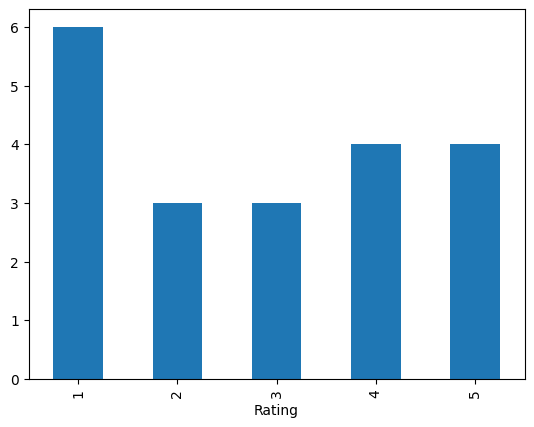

In [21]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar")


In [18]:
books_df.columns

Index(['Title', 'Price', 'Rating'], dtype='object')

In [19]:
from nbresult import ChallengeResult

result = ChallengeResult('books',
    columns=books_df.columns,
    title=str(books_df.loc[0,'Title']),
    price=books_df.loc[0,'Price'],
    rating=books_df.loc[0,'Rating']
)
result.write()
print(result.check())
print(books_df.loc[0,'Rating'])
print(books_df.loc[0,'Price'])
print(books_df.loc[0,'Title'])


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/viana.abreu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/viana.abreu/code/lewagon/data-book_scraping/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 5 items

test_books.py::TestBooks::test_books_df_columns_name PASSED              [ 20%]
test_books.py::TestBooks::test_books_df_columns_size PASSED              [ 40%]
test_books.py::TestBooks::test_first_book_price PASSED                   [ 60%]
test_books.py::TestBooks::test_first_book_rating PASSED                  [ 80%]
test_books.py::TestBooks::test_first_book_title PASSED                   [100%]

============================== 5 passed in 0.49s ===============================


💯 You can commit your code:

git add tests/books.pickle

git commit -m 'Completed books step'

git push origin master

3
51.77
A Ligh

In [17]:
books_df.columns

Index(['Title', 'Price', 'Rating'], dtype='object')